### 하이퍼파라미터
* 예측력을 높이기 위해 사용
* 과대/과소 적합을 방지하기 위해 사용
* 사용자가 지정하는 파라미터

#### 하이퍼파라미터 튜닝
* 특정 알고리즘의 매개변수 값을 변경하면서 최적의 파라미터를 찾는 방식
* GridSearchCV클래스를 통해 하이퍼파라미터 탐색과 교차 검증을 한번에 수행

#### GridSearchCV
* 교차 검증으로 하이퍼파라미터 탐색을 수행한다
* 최상의 모델을 찾은 후 훈련 세트 전체를 사용해 최종 모델을 훈련한다
* 매개변수
    - GridSearchCV(모델, param_grid = 파라미터, cv=반복횟수, n_jobs=코어 수(-1, 모든 코어 사용))

### K-최근접 이웃 알고리즘
* 주위에서 가장 가까운 다른 데이터를 보고 현재 데이터를 판단

#### 하이퍼파라미터
* n_neighbors
    - 기본 가까운 5개의 데이터를 보고 자기 자신이 어디에 속하는지를 판단
    - 비교하고자 하는 데이터의 수가 적을 수록 과대 적합이 된다
* metric : 거리계산 척도
    - euclidean(녹색) : 유클리디안 거리 측정
        * 목표 지점까지 가장 짧은 거리
    - manhattan(빨간색) : 맨하튼 거리 측정 방법
        * 찾아가는 경로의 모든 길이의 합
* weights : 가중치
    - uniform : 거리에 가중치 부여하지 않음(균일한 가중치)
    - distance : 거리에 가중치 부여(가까이 있는 데이터에 가중치)

![IMG](images/거리척도.png)

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/titanic_cleaning.csv")
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

In [4]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare']
label = "Survived"
X, y = df[features], df[label]

### min max scaler

In [5]:
minMaxScaler = MinMaxScaler()
minMaxScaler.fit(X)
X_scaler = minMaxScaler.transform( X )

In [6]:
X_train_minMax, X_test_minMax, y_train, y_test = \
                train_test_split(X_scaler, y, test_size=0.2 )

### knn 모델 생성

In [7]:
knn = KNeighborsClassifier();
knn.fit( X_train_minMax, y_train )
print("train : ", knn.score( X_train_minMax, y_train))
print("test : ", knn.score( X_test_minMax, y_test))

train :  0.8567415730337079
test :  0.7932960893854749


In [13]:
k_param = range(1,20)
for i in k_param:
    print( i , end=", ")

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 

In [14]:
knn = KNeighborsClassifier( n_neighbors=1 )
knn.fit(X_train_minMax, y_train )
print("train : ", knn.score( X_train_minMax, y_train) )
print("test : ", knn.score( X_test_minMax, y_test) )

train :  0.9803370786516854
test :  0.7932960893854749


In [15]:
knn = KNeighborsClassifier( n_neighbors=2 )
knn.fit(X_train_minMax, y_train )
print("train : ", knn.score( X_train_minMax, y_train) )
print("test : ", knn.score( X_test_minMax, y_test) )

train :  0.8876404494382022
test :  0.8044692737430168


In [16]:
knn = KNeighborsClassifier( n_neighbors=3 )
knn.fit(X_train_minMax, y_train )
print("train : ", knn.score( X_train_minMax, y_train) )
print("test : ", knn.score( X_test_minMax, y_test) )

train :  0.8778089887640449
test :  0.8044692737430168


In [18]:
dic = { "k" : k_param , "다른" : k_param}
pd.DataFrame( dic )

,k,다른
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5
5,6,6
6,7,7
7,8,8
8,9,9
9,10,10


In [21]:
test = []
test.append( 100 ); test.append( 200 );test.append( "안녕" );
test

[100, 200, '안녕']

In [22]:
dic = { "k": [1,2,3] , "test":test }
pd.DataFrame( dic )

,k,test
0,1,100
1,2,200
2,3,안녕


In [31]:
k_param = range( 1 , 50 )
train_list = []
test_list = []
num_list = []

for num in k_param:
    knn = KNeighborsClassifier( n_neighbors = num )
    knn.fit(X_train_minMax, y_train )
    
    num_list.append( num )
    train_list.append( knn.score(X_train_minMax, y_train) )
    test_list.append( knn.score(X_test_minMax, y_test) )
dic = { "num" : num_list , 
       "train score" : train_list , 
       "test score" : test_list 
      }
score_df = pd.DataFrame( dic )
score_df

,num,train score,test score
0,1,0.980337,0.793296
1,2,0.887640,0.804469
2,3,0.877809,0.804469
3,4,0.869382,0.821229
4,5,0.856742,0.793296
5,6,0.851124,0.793296
6,7,0.852528,0.815642
7,8,0.842697,0.815642
8,9,0.841292,0.821229
9,10,0.837079,0.804469


<AxesSubplot:xlabel='num', ylabel='train score'>

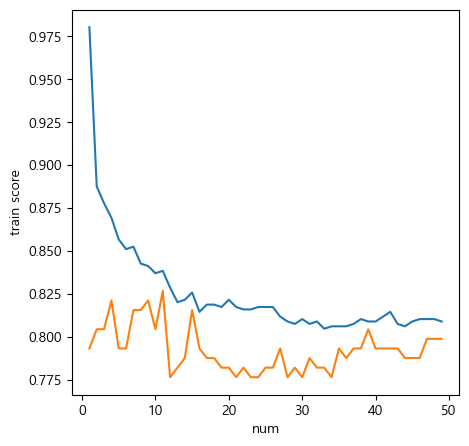

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family="Malgun Gothic")
plt.subplots( figsize=(5,5) )

sns.lineplot( x="num", y="train score", data=score_df)
sns.lineplot( x="num", y="test score", data=score_df)

### GridSearchCV

* GridSearchCV( 모델 , param_grid=파라미터 , cv=폴드 수, n_jobs=코어수  )

In [33]:
from sklearn.model_selection import GridSearchCV

k_param = range( 1 , 11 )
params = { "n_neighbors" : k_param }
knn = KNeighborsClassifier()

grid_cv = GridSearchCV(knn, param_grid=params, cv=5, n_jobs=-1 )
grid_cv.fit( X_train_minMax, y_train )

print("최적의 하이퍼 파라미터 : ", grid_cv.best_params_ )
print("최고 예측력 : ", grid_cv.best_score_)

print( "train : ", grid_cv.score(X_train_minMax, y_train) )
print( "test : ", grid_cv.score(X_test_minMax, y_test) )

최적의 하이퍼 파라미터 :  {'n_neighbors': 4}
최고 예측력 :  0.8173249285925342
train :  0.8693820224719101
test :  0.8212290502793296


In [ ]:
params = {
    "n_neighbors" : range(1, 1000),
    "metric" : ["manhattan", "euclidean"],
    "weights" : ["uniform", "distance"]
}
grid_cv = GridSearchCV(knn, param_grid=params, cv=5, n_jobs=-1)
grid_cv.fit( X_train_minMax, y_train )

print("최적의 하이퍼 파라미터 : ", grid_cv.best_params_ )

print("train : ", grid_cv.score( X_train_minMax, y_train))
print("test : ", grid_cv.score( X_test_minMax, y_test))